**Build a CNN Based Classifier for Classifying the Objects using CIFAR100 Dataset.**

**Requirements:**

* Seven Number of Convolutional 2D Layers starting with 1024 filters.
* Kernel size 3 x 3
* Two Average Pooling Layers, in the sixth and seventh Convolutional Layer.
* Stride 2
* Padding ‘0’
* Optimizer Adam
* Loss function catagorical_crossentropy


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [3]:
# Data Preprocessing (Normalization)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255.0
test_images /= 255.0

In [10]:
# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
print(train_images.shape[1:])

(32, 32, 3)


In [24]:
# Create a Sequential model
model = Sequential()

# First convolutional layer
model.add(Conv2D(1024, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Second convolutional layer
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))

# Third convolutional layer
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

# Fourth convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Fifth convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Sixth convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# First pooling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='same'))

# Seventh convolutional layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

# Second pooling layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='same'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Dense layer with 100 output units and softmax activation
model.add(Dense(100, activation='softmax'))

In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
# Train the model
history=model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 139s 88ms/step - loss: 4.2373 - accuracy: 0.0529 - val_loss: 3.9060 - val_accuracy: 0.1044
Epoch 2/5
1563/1563 [==============================] - 138s 88ms/step - loss: 3.6936 - accuracy: 0.1361 - val_loss: 3.5591 - val_accuracy: 0.1734
Epoch 3/5
1563/1563 [==============================] - 136s 87ms/step - loss: 3.3681 - accuracy: 0.1996 - val_loss: 3.3197 - val_accuracy: 0.2200
Epoch 4/5
1563/1563 [==============================] - 138s 88ms/step - loss: 3.1265 - accuracy: 0.2441 - val_loss: 3.1516 - val_accuracy: 0.2453
Epoch 5/5
1563/1563 [==============================] - 136s 87ms/step - loss: 2.9585 - accuracy: 0.2779 - val_loss: 3.0136 - val_accuracy: 0.2662


In [27]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 8s 27ms/step - loss: 3.0136 - accuracy: 0.2662
Test accuracy: 0.2662000060081482


In [29]:
# Make predictions on the test set
predictions = model.predict(test_images)

313/313 [==============================] - 8s 26ms/step


In [30]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[42  1  2 ...  0  0  0]
 [ 1 27  1 ...  0  1  1]
 [ 1  1 16 ...  3  2  1]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 2  0  5 ...  1  6  1]
 [ 1  0  1 ...  3  0  6]]


In [31]:
# Generate classification report
print('Classification Report:\n', classification_report(test_labels.argmax(axis=1), predictions.argmax(axis=1)))

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.42      0.45       100
           1       0.31      0.27      0.29       100
           2       0.18      0.16      0.17       100
           3       0.15      0.05      0.07       100
           4       0.14      0.12      0.13       100
           5       0.30      0.10      0.15       100
           6       0.30      0.19      0.23       100
           7       0.30      0.13      0.18       100
           8       0.35      0.26      0.30       100
           9       0.41      0.41      0.41       100
          10       0.17      0.12      0.14       100
          11       0.23      0.15      0.18       100
          12       0.33      0.27      0.30       100
          13       0.23      0.41      0.30       100
          14       0.37      0.19      0.25       100
          15       0.15      0.17      0.16       100
          16       0.37      0.26      0.31       100
   

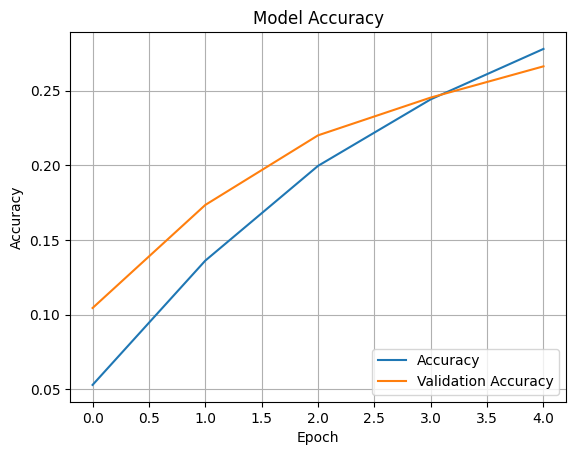

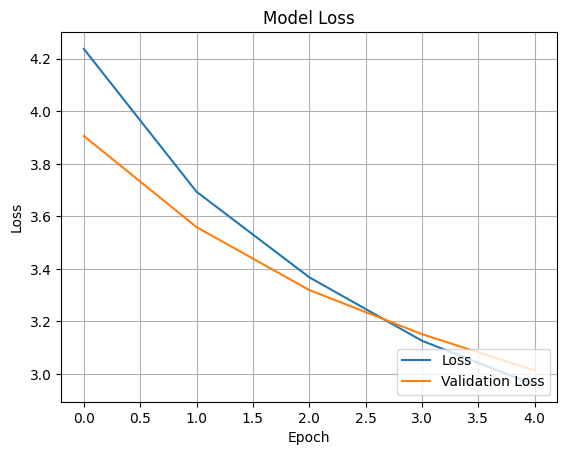

In [32]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()